
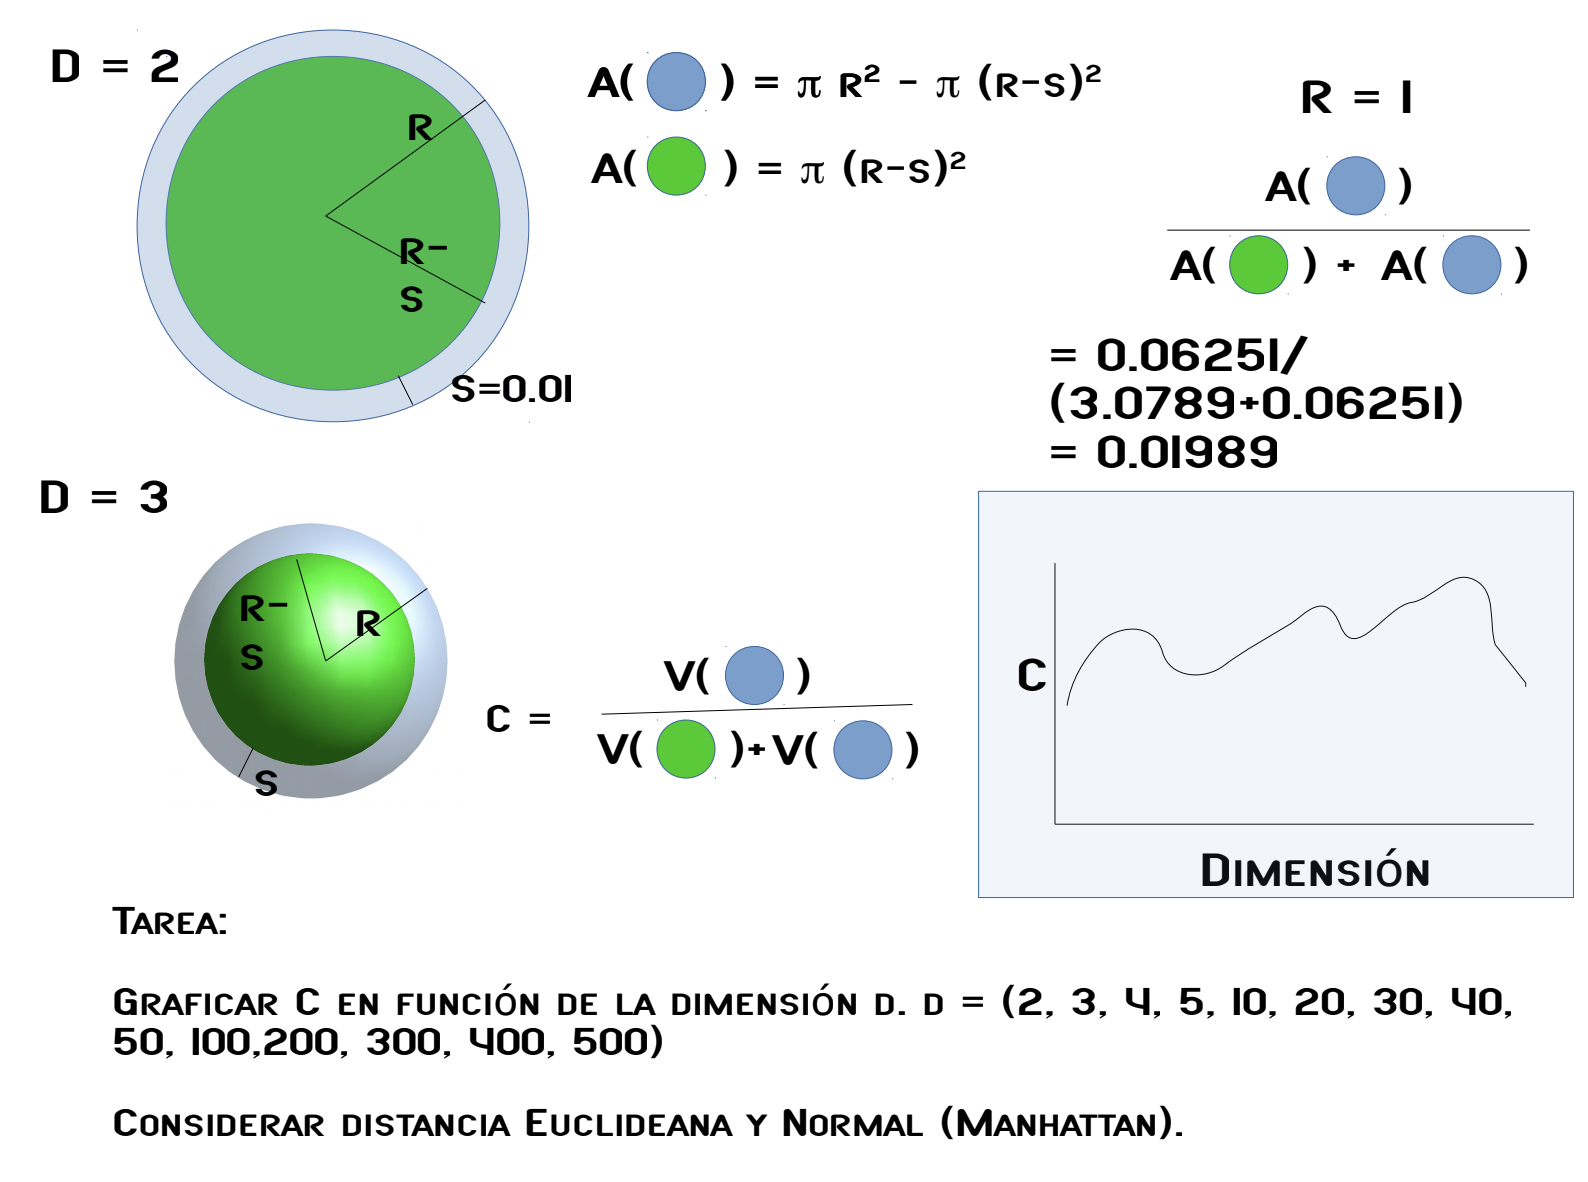


In [1]:
import math
import matplotlib.pyplot as plt

## Distance Formulas

In multidimensional space, two commonly used metrics to measure distance between points are the **Euclidean** and **Manhattan** distances.

---

### Euclidean Distance (L2-Norm):

The Euclidean distance between two points \( x = (x_1, x_2, ..., x_n) \) and \( y = (y_1, y_2, ..., y_n) \) in \( n \)-dimensional space is defined as:

$$
d_{\text{Euclidean}}(x, y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}
$$

This metric corresponds to the straight-line distance between two points in Euclidean geometry.

---

### Manhattan Distance (L1-Norm):

The Manhattan distance between two points \( x = (x_1, x_2, ..., x_n) \) and \( y = (y_1, y_2, ..., y_n) \) in \( n \)-dimensional space is defined as:

$$
d_{\text{Manhattan}}(x, y) = \sum_{i=1}^{n}|x_i - y_i|
$$

This metric represents the sum of absolute differences across all dimensions. It is analogous to the distance traveled along grid lines in a city layout (hence the name "Manhattan").

---


Dimension | C (Euclidean) | C (Manhattan)
        2 |  1.990000e-02 |  1.990000e-02
        3 |  2.970100e-02 |  2.970100e-02
        4 |  3.940399e-02 |  3.940399e-02
        5 |  4.900995e-02 |  4.900995e-02
       10 |  9.561792e-02 |  9.561792e-02
       20 |  1.820931e-01 |  1.820931e-01
       30 |  2.602996e-01 |  2.602996e-01
       40 |  3.310282e-01 |  3.310282e-01
       50 |  3.949939e-01 |  3.949939e-01
      100 |  6.339677e-01 |  6.339677e-01
      200 |  8.660203e-01 |  8.660203e-01
      300 |  9.509591e-01 |  9.509591e-01
      400 |  9.820494e-01 |  9.820494e-01
      500 |  9.934295e-01 |  9.934295e-01


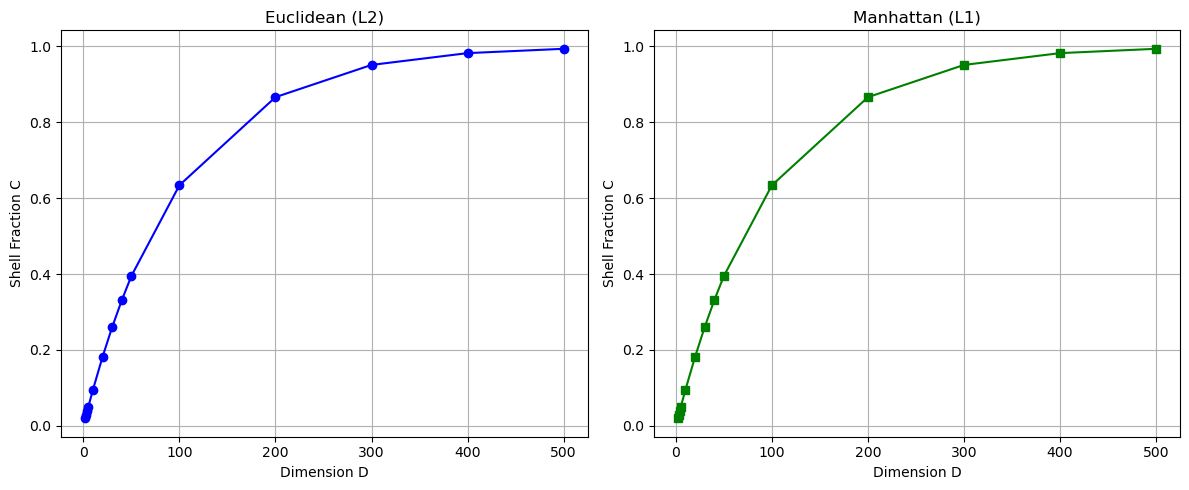

In [2]:
# Define dimensions, radius R and shell thickness s
dimensions = [2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500]

# Examplary values for R and s
R = 1.0
s = 0.01

# euclidean volume
def log_volume_l2(r, d):
    """
    Returns ln(Volume) of the d-dimensional Euclidean ball of radius r.
    Formula: ln(V) = (d/2)*ln(pi) + d*ln(r) - lnGamma(d/2 + 1)
    """
    if r <= 0:
        return float('-inf')
    return (d / 2.0) * math.log(math.pi) + d * math.log(r) - math.lgamma(d / 2.0 + 1.0)

#manhattan volume
def log_volume_l1(r, d):
    """
    Returns ln(Volume) of the d-dimensional L1-ball (cross-polytope) of radius r.
    Formula: ln(V) = d*ln(2) + d*ln(r) - lnGamma(d + 1)
    """
    if r <= 0:
        return float('-inf')
    return d * math.log(2.0) + d * math.log(r) - math.lgamma(d + 1)


#shell fraction
def shell_fraction(R, s, d, log_vol_func):
    """
    Computes the fraction of volume in the outer shell [R-s, R] in dimension d,
    using a log-volume function (either log_volume_l2 or log_volume_l1).
    """
    logVout = log_vol_func(R, d)  # ln(V_out)
    logVin = log_vol_func(R - s, d) if (R - s) > 0 else float('-inf')
    
    # If V_out is effectively zero, return 0 fraction
    if logVout == float('-inf'):
        return 0.0
    if logVin == float('-inf'):
        return 1.0
    
    ratio = math.exp(logVin - logVout)
    return 1.0 - ratio

euclidean_shell_fractions = []
manhattan_shell_fractions = []

for d in dimensions:
    frac_l2 = shell_fraction(R, s, d, log_volume_l2)
    frac_l1 = shell_fraction(R, s, d, log_volume_l1)
    euclidean_shell_fractions.append(frac_l2)
    manhattan_shell_fractions.append(frac_l1)

# results in a table
print("Dimension | C (Euclidean) | C (Manhattan)")
for d, c_l2, c_l1 in zip(dimensions, euclidean_shell_fractions, manhattan_shell_fractions):
    print(f"{d:9d} | {c_l2:13.6e} | {c_l1:13.6e}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(dimensions, euclidean_shell_fractions, 'o-', color='blue')
ax1.set_title("Euclidean (L2)")
ax1.set_xlabel("Dimension D")
ax1.set_ylabel("Shell Fraction C")
ax1.grid(True)

ax2.plot(dimensions, manhattan_shell_fractions, 's-', color='green')
ax2.set_title("Manhattan (L1)")
ax2.set_xlabel("Dimension D")
ax2.set_ylabel("Shell Fraction C")
ax2.grid(True)

plt.tight_layout()
plt.show()


## Shell Fraction for High-Dimensional Balls

When calculating the fraction \( C \) of the volume contained in an outer shell (of thickness \( s \)) for a high-dimensional ball (radius \( R \)), we have:

$$
C = \frac{V(R) - V(R - s)}{V(R)} = 1 - \frac{V(R - s)}{V(R)}.
$$

### Euclidean (L2) and Manhattan (L1) Volumes

- **Euclidean ball** (L2-norm):
$$
V_{L2}(r,d) = \frac{\pi^{d/2}}{\Gamma(\frac{d}{2}+1)} r^d
$$

- **Manhattan ball** (L1-norm or cross-polytope):
$$
V_{L1}(r,d) = \frac{2^d}{d!} r^d
$$

Notice that both volume formulas share a common factor of \( r^d \). This is key to the simplification.

### Simplification of \( C \):

Substituting the volume formulas into the shell fraction, we have:

$$
C = 1 - \frac{V(R - s)}{V(R)} 
= 1 - \frac{\text{(constant factor)} \cdot (R - s)^d}{\text{(constant factor)} \cdot R^d}
$$

Because the constant factors (\(\frac{\pi^{d/2}}{\Gamma(\frac{d}{2}+1)}\) and \(\frac{2^d}{d!}\)) appear in both numerator and denominator, they cancel out. Thus, the fraction simplifies to:

$$
C = 1 - \frac{(R - s)^d}{R^d} = 1 - \left(1 - \frac{s}{R}\right)^d
$$

### Result and Implications:

The shell fraction therefore simplifies neatly to:

$$
C = 1 - (1 - s)^d \quad \text{(for } R = 1\text{)}
$$

This simplification indicates an important geometric insight:

- For **small \( s \)** and **large dimensions \( d \)**, nearly **all the volume** of high-dimensional balls is concentrated in a very thin shell close to their surface, irrespective of the type of norm (Euclidean or Manhattan).

This phenomenon illustrates the **curse of dimensionality**, where high-dimensional spaces behave in ways that differ significantly from low-dimensional intuition.


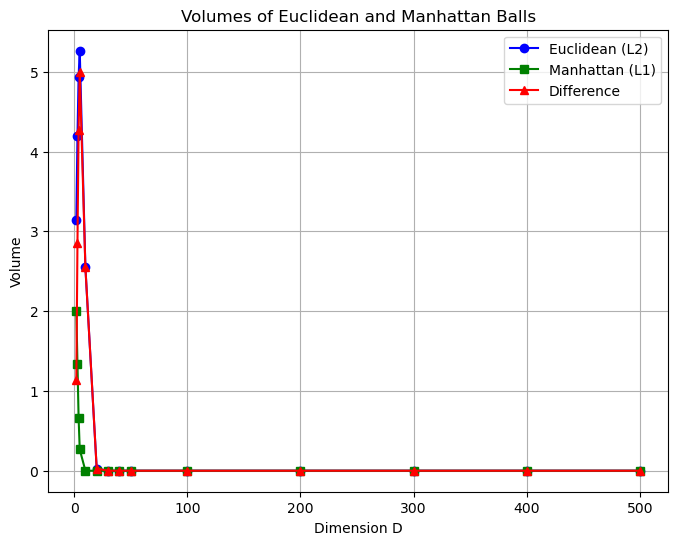

In [3]:
# Plotting the volumes of the two balls and the difference between them
volumes_l2 = [math.exp(log_volume_l2(R, d)) for d in dimensions]
volumes_l1 = [math.exp(log_volume_l1(R, d)) for d in dimensions]
volume_diffs = [volumes_l2[i] - volumes_l1[i] for i in range(len(dimensions))]
plt.figure(figsize=(8, 6))
plt.plot(dimensions, volumes_l2, 'o-', label="Euclidean (L2)", color='blue')
plt.plot(dimensions, volumes_l1, 's-', label="Manhattan (L1)", color='green')
plt.plot(dimensions, volume_diffs, '^-', label="Difference", color='red')
plt.title("Volumes of Euclidean and Manhattan Balls")
plt.xlabel("Dimension D")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.show()


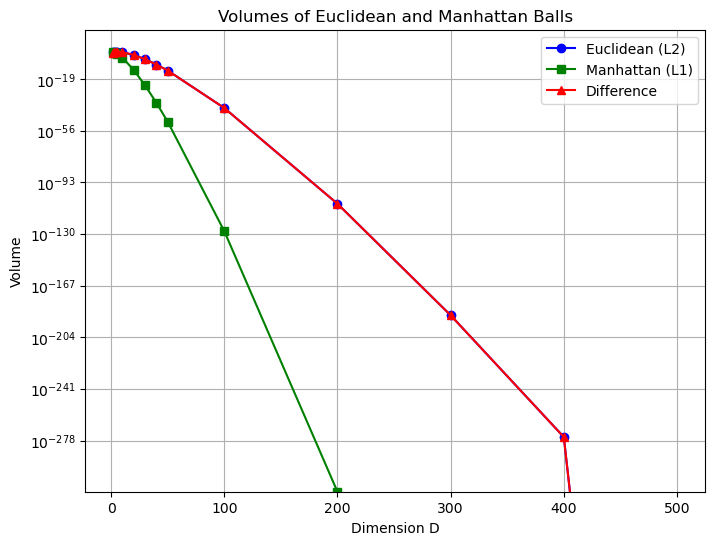

In [4]:
# Plotting the volumes of the two balls and the difference between them
volumes_l2 = [math.exp(log_volume_l2(R, d)) for d in dimensions]
volumes_l1 = [math.exp(log_volume_l1(R, d)) for d in dimensions]
volume_diffs = [volumes_l2[i] - volumes_l1[i] for i in range(len(dimensions))]
plt.figure(figsize=(8, 6))
plt.plot(dimensions, volumes_l2, 'o-', label="Euclidean (L2)", color='blue')
plt.plot(dimensions, volumes_l1, 's-', label="Manhattan (L1)", color='green')
plt.plot(dimensions, volume_diffs, '^-', label="Difference", color='red')
plt.title("Volumes of Euclidean and Manhattan Balls")
plt.xlabel("Dimension D")
plt.ylabel("Volume")
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()


## Why the Shell Fraction \( C \) Converges to Zero for High Dimensions

Shell fraction is defined as:

$$
C = 1 - (1 - s)^d
$$

where:
- \( s \) is the thickness of the outer shell (small value, e.g., \( s = 0.01 \))
- \( d \) is the dimensionality.

As the dimension \( d \) grows, the term \((1 - s)^d\) behaves as follows:

- Since \(0 < (1 - s) < 1\), raising it to increasingly large powers \( d \) causes it to rapidly approach \(0\):

$$
\lim_{d \to \infty} (1 - s)^d = 0
$$

Thus, the fraction \( C \) approaches:

$$
\lim_{d \to \infty} C = 1 - 0 = 1
$$

**Important clarification**: Actually, the expression above indicates that \(C\) approaches **1** as \( d \) grows large, meaning nearly all the volume is concentrated in the outer shell (not zero). The fraction of volume in the *inner region* shrinks rapidly to zero. Thus:

- **Inner volume fraction** → \(0\) as \( d \to \infty \).
- **Outer shell fraction (\(C\))** → \(1\) as \( d \to \infty \).

- The **inner region** (center of the ball) becomes insignificant as dimension increases.
- Almost the **entire volume** is concentrated in a thin outer shell near the surface.

This phenomenon is known as the **"curse of dimensionality"** and is critical in high-dimensional geometry, as it implies that high-dimensional balls become essentially hollow with volume mostly on their surfaces.


## Visualization of Sphere in 3D

In [5]:
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function that generates the Plotly figure.
def generate_fig(s, X_cut):
    # --- Outer and Inner Spheres ---
    num_phi = 50
    num_theta = 50
    phi = np.linspace(0, np.pi, num_phi)
    theta = np.linspace(0, 2*np.pi, num_theta)
    phi, theta = np.meshgrid(phi, theta)
    
    # Outer sphere (radius 1)
    x_outer = np.sin(phi) * np.cos(theta)
    y_outer = np.sin(phi) * np.sin(theta)
    z_outer = np.cos(phi)
    # Only show points with x >= X_cut
    mask_outer = x_outer < X_cut
    x_outer[mask_outer] = np.nan
    y_outer[mask_outer] = np.nan
    z_outer[mask_outer] = np.nan
    
    # Inner sphere (radius = 1 - s)
    r_inner = 1 - s
    x_inner = r_inner * np.sin(phi) * np.cos(theta)
    y_inner = r_inner * np.sin(phi) * np.sin(theta)
    z_inner = r_inner * np.cos(phi)
    mask_inner = x_inner < X_cut
    x_inner[mask_inner] = np.nan
    y_inner[mask_inner] = np.nan
    z_inner[mask_inner] = np.nan
    
    # --- Cross-Section Surfaces at x = X_cut ---
    # Cross section for the outer sphere:
    if X_cut**2 < 1:
        R_outer = np.sqrt(1 - X_cut**2)
    else:
        R_outer = 0
    
    # Cross section for the inner sphere:
    if X_cut**2 < (r_inner**2):
        R_inner_cut = np.sqrt(r_inner**2 - X_cut**2)
    else:
        R_inner_cut = 0
    
    # Create a polar grid for the cross-section (in the y–z plane)
    num_r = 50
    num_ang = 50
    r_vals = np.linspace(0, R_outer, num_r)
    ang_vals = np.linspace(0, 2*np.pi, num_ang)
    r_grid, ang_grid = np.meshgrid(r_vals, ang_vals)
    y_disc = r_grid * np.cos(ang_grid)
    z_disc = r_grid * np.sin(ang_grid)
    x_disc = X_cut * np.ones_like(y_disc)
    
    # Inner disc: for r <= R_inner_cut (inner volume)
    y_inner_disc = np.where(r_grid <= R_inner_cut, y_disc, np.nan)
    z_inner_disc = np.where(r_grid <= R_inner_cut, z_disc, np.nan)
    x_inner_disc = X_cut * np.ones_like(y_inner_disc)
    
    # Outer disc: for r >= R_inner_cut (shell)
    y_outer_annulus = np.where(r_grid >= R_inner_cut, y_disc, np.nan)
    z_outer_annulus = np.where(r_grid >= R_inner_cut, z_disc, np.nan)
    x_outer_annulus = X_cut * np.ones_like(y_outer_annulus)
    
    # Compute the shell volume fraction for a unit sphere in 3D.
    frac = 1 - (1 - s)**3
    

    traces = []
    # Outer sphere
    traces.append(go.Surface(
        x=x_outer, y=y_outer, z=z_outer,
        colorscale='Blues',
        showscale=False,
        opacity=0.5,
        name='Outer Sphere'
    ))
    # Inner sphere
    traces.append(go.Surface(
        x=x_inner, y=y_inner, z=z_inner,
        colorscale='Oranges',
        showscale=False,
        opacity=0.5,
        name='Inner Surface'
    ))
    # Cross-section inner disc (inner volume)
    traces.append(go.Surface(
        x=x_inner_disc, y=y_inner_disc, z=z_inner_disc,
        colorscale=[[0, 'orange'], [1, 'orange']],
        showscale=False,
        opacity=1.0,
        name='Inner Volume (Cut)'
    ))
    # Cross-section outer annulus (shell)
    traces.append(go.Surface(
        x=x_outer_annulus, y=y_outer_annulus, z=z_outer_annulus,
        colorscale=[[0, 'blue'], [1, 'blue']],
        showscale=False,
        opacity=1.0,
        name='Shell (Cut)'
    ))
    
    layout = go.Layout(
        title=f"Shell thickness s = {s:.3f} (Shell fraction = {frac:.3f}), Cross-section plane x = {X_cut:.3f}",
        scene=dict(
            xaxis=dict(range=[-1.2, 1.2]),
            yaxis=dict(range=[-1.2, 1.2]),
            zaxis=dict(range=[-1.2, 1.2]),
            aspectmode='data'
        )
    )
    
    fig = go.Figure(data=traces, layout=layout)
    return fig

# Create an Output widget to hold the plot. (wegen jupyter notebook)
out = widgets.Output()
display(out)

# Update function to refresh the plot in the output widget. Wenn nicht werden mehrere generiert
def update_plot(s, X_cut):
    with out:
        clear_output(wait=True)
        fig = generate_fig(s, X_cut)
        fig.show()

# Create two sliders for s and X_cut.
s_slider = widgets.FloatSlider(min=0, max=0.5, step=0.01, value=0.1, description='Shell thickness s')
X_cut_slider = widgets.FloatSlider(min=-1, max=1, step=0.01, value=0.0, description='Cut plane x')

# Use interactive_output to tie the sliders to update_plot.
ui = widgets.HBox([s_slider, X_cut_slider])
interactive_plot = widgets.interactive_output(update_plot, {'s': s_slider, 'X_cut': X_cut_slider})

# Display the sliders and the output.
display(ui, out)



Output()

Output()